<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/new/MMI_Monthly_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"To find the relationship between RSI and monthly returns you can use the k-means technique of unsupervised learning. The steps are as follows:

1. Calculate RSI and monthly returns
2. Scale the data
3. Apply k-means for optimum number of clusters. Use the WCSS technique to select the optimum clusters.
4. Plot the clusters on the X-Y chart and see the relationship between RSI values and monthly returns."

In [101]:
#!pip install yfinance
!pip install pandas_ta==0.2.45b0

In [102]:
#import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
data=pd.read_csv('/content/MMI_2022-01-01.csv')

In [105]:
data=data[::-1]

In [106]:
data['ret30']=data[' Nifty Index'].pct_change(30)

print()

In [107]:
data.tail(5)

,Date,Market Mood Index,Nifty Index,ret30
4,27/12/2021,35.431692,17086.25,-0.056152
3,28/12/2021,42.642083,17233.25,-0.048384
2,29/12/2021,54.428337,17213.60,-0.043646
1,30/12/2021,57.055673,17203.95,-0.038813
0,31/12/2021,63.256005,17354.05,-0.023122


In [108]:
selected_data=data[[' Market Mood Index','ret30']].dropna()

In [109]:
selected_data.shape

(2364, 2)

In [110]:
selected_data.tail(2)

,Market Mood Index,ret30
1,57.055673,-0.038813
0,63.256005,-0.023122


In [111]:
sc=StandardScaler()

In [112]:
data_transformed=pd.DataFrame(sc.fit_transform(selected_data), columns = selected_data.columns)
data_transformed

,Market Mood Index,ret30
0,-0.633702,-0.794595
1,-1.179109,-1.050492
2,-0.834025,-1.148807
3,0.051250,-0.712187
4,0.036671,-0.544046
...,...,...
2359,-0.853980,-1.254135
2360,-0.444595,-1.120714
2361,0.224594,-1.039350
2362,0.373767,-0.956334


In [113]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

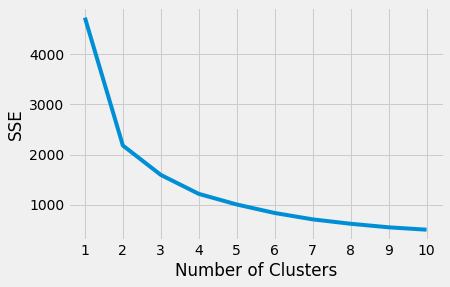

In [114]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [115]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(data_transformed)

KMeans(init='random', n_clusters=4, random_state=42)

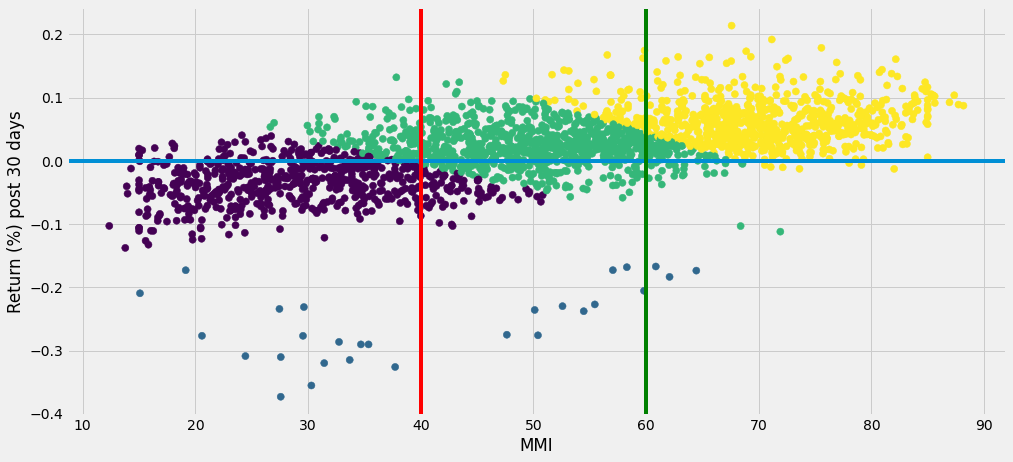

In [116]:
# Getting list of cluster numbers for each data point in X
clusters = kmeans.predict(data_transformed)

# Plotting values
color_map = clusters
plt.figure(figsize=(15, 7))
plt.scatter(selected_data.iloc[:, 0],
            selected_data.iloc[:, 1], c=color_map, s=50, cmap='viridis')

# Plotting centroids
centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('MMI')
plt.ylabel('Return (%) post 30 days')
plt.axhline(y=0)
plt.axvline(x=40, color='r')
plt.axvline(x=60,color='g')
plt.show()

In [117]:
#data_transformed['pct_change']=data['close'][29:].pct_change().dropna().shift(-1).values

In [118]:
#data_transformed['sign']=np.sign(data['close'][29:].pct_change().dropna().shift(-1).values)

In [119]:
data_transformed['cluster']=clusters

In [120]:
#data_transformed[data_transformed['cluster']==0]['pct_change'].reset_index(drop=True).plot(kind='bar');

In [121]:
#data_transformed[data_transformed['cluster']==1]['pct_change'][:].reset_index(drop=True).plot(kind='bar');

KeyError: ignored

In [ ]:
data_transformed[data_transformed['cluster']==2]['pct_change'].reset_index(drop=True).plot(kind='bar');

In [ ]:
data_transformed[data_transformed['cluster']==3]['pct_change'].reset_index(drop=True).plot(kind='bar');

In [ ]:
(data_transformed[data_transformed['cluster']==3]['sign']==1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==3]['sign']==-1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==1]['sign']==1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==1]['sign']==-1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==2]['sign']==1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==2]['sign']==-1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==0]['sign']==1).sum()

In [ ]:
(data_transformed[data_transformed['cluster']==0]['sign']==-1).sum()